<a href="https://colab.research.google.com/github/MaykonJhonata/MVP_Machine_Learning_Maykon_Rodrigues_4025025000400/blob/main/MVP_ML_%26_Analytics_Maykon_Rodrigues_att.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MVP: *Machine Learning & Analytics*
**Autor:** _Maykon Jhonata Rodrigues_  

**Data:** 27/08/2025

**Matr√≠cula:** 4025025000400

**Dataset:** [AI4I 2020 Predictive Maintenance Dataset](https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020)

[AI4I 2020 Predictive Maintance - GitHub](https://raw.githubusercontent.com/MaykonJhonata/Predictive-Maintenance-Dataset-AI4I-2020-/refs/heads/main/dataset_tratado.csv)

# MVP ‚Äî Manuten√ß√£o Preditiva (AI4I 2020)

**Objetivo:** construir um MVP de *machine learning* para **classifica√ß√£o** de falhas (alvo: `Falha Geral`), comparando:
1) **Modelo cru** (sem padroniza√ß√£o/normaliza√ß√£o),
2) **Pipeline com pr√©-processamento** (imputa√ß√£o, padroniza√ß√£o/normaliza√ß√£o e One-Hot Encoding),
3) Estrat√©gias de **balanceamento** (class_weight vs. SMOTE).

**M√©trica principal:** F1 ponderado (classes desbalanceadas).  
**M√©tricas de apoio:** *recall* da classe 1 (falha), *ROC AUC*, *accuracy*.




## ‚úÖ Checklist do MVP (o que precisa conter)
- ‚úÖ **Problema definido** e contexto de neg√≥cio
- **Descri√ß√£o:** Classifica√ß√£o bin√°ria para prever *Falha Geral (0/1)* em m√°quinas industriais a partir de sensores de processo.  
- **Justificativa:** Identificar falhas de forma antecipada permite manuten√ß√£o preditiva, reduzindo custos e aumentando seguran√ßa.  

- [‚úÖ] **Carga e prepara√ß√£o** dos dados (sem vazamento de dados)
- **Origem:** Dataset p√∫blico (AI4I 2020 Predictive Maintenance Dataset).  
- **Importa√ß√£o:** Feita via URL direta (raw GitHub).  
- **Prepara√ß√£o:** Convers√£o de tipos, remo√ß√£o de colunas de vazamento (flags de falha espec√≠ficas) e IDs.  

- [‚úÖ ] **Divis√£o** em treino/valida√ß√£o/teste (ou valida√ß√£o cruzada apropriada)
- **Treino/Teste:** Split 80/20 estratificado em `y`.  
- **Valida√ß√£o:** Uso de **StratifiedKFold (5-fold)** para tuning e compara√ß√£o de modelos.  

- [‚úÖ] **Tratamento**: limpeza, transforma√ß√£o e **engenharia de atributos**
- **Imputa√ß√£o:** Mediana para vari√°veis num√©ricas.  
- **Codifica√ß√£o:** OneHotEncoder para atributo categ√≥rico `Tipo`.  
- **Escalonamento:** MinMaxScaler aplicado ao `Torque` (sens√≠vel a escala).  
- **Feature Selection:** Exclus√£o de vari√°veis que causariam vazamento.  

- [‚úÖ] **Modelagem**: comparar abordagens/modelos (com **baseline**)
- **Baseline:** DummyClassifier.  
- **Modelos comparados:** Regress√£o Log√≠stica, Random Forest.  
- **Estrat√©gia:** Pipelines com `ColumnTransformer` garantindo reprodutibilidade.  


- [‚úÖ] **Otimiza√ß√£o de hiperpar√¢metros**
- **T√©cnica:** RandomizedSearchCV (125 combina√ß√µes).  
- **Valida√ß√£o:** 5-fold estratificado.  
- **M√©trica-alvo:** F1-weighted (devido ao desbalanceamento).  


- [‚úÖ] **Avalia√ß√£o** com **m√©tricas adequadas** e discuss√£o de limita√ß√µes
- **M√©tricas usadas:** Accuracy, F1-weighted, Balanced Accuracy, ROC AUC, Precision-Recall (AP).  
- **Visualiza√ß√µes:** Matrizes de confus√£o, curvas ROC e Precision‚ÄìRecall.  
- **Resultado:** RF com `class_weight=balanced` obteve melhor equil√≠brio entre recall da minoria e taxa de falsos positivos.  
- **Limita√ß√µes:** Classe positiva √© rara; threshold √≥timo depende de custos reais de neg√≥cio.  


- [‚úÖ] **Boas pr√°ticas**: seeds fixas, tempo de treino, recursos computacionais, documenta√ß√£o
- **Reprodutibilidade:** `random_state=42` fixado em todos os lugares sens√≠veis.  
- **Pipelines:** Implementados para treino e predi√ß√£o consistentes.  
- **Baseline:** Avaliado antes de modelos mais complexos.  
- **Persist√™ncia:** Modelo final salvo com `joblib`.  
- **Documenta√ß√£o:** Todas as etapas explicadas em c√©lulas Markdown.  


- [‚úÖ] **Pipelines reprodut√≠veis** (sempre que poss√≠vel)
- **Pr√©-processamento unificado:** `ColumnTransformer` para atributos categ√≥ricos e num√©ricos.  
- **Modelos:** LogisticRegression e RandomForest acoplados a pipelines.  
- **Vers√£o com SMOTE:** Pipeline incorporando balanceamento da classe antes do modelo.

1. Escopo, objetivo e defini√ß√£o do problema

Contexto e dataset.
O AI4I 2020 Predictive Maintenance Dataset cont√©m medi√ß√µes operacionais de m√°quinas industriais obtidas por sensores e registros automatizados (ex.: temperaturas, velocidade rotacional, torque e desgaste de ferramenta). O cen√°rio √© t√≠pico de manufatura discreta com necessidade de continuidade operacional e controle de custos de manuten√ß√£o.

Objetivo.
Prever, a partir das vari√°veis de processo, se ocorrer√° falha geral em um ciclo/inst√¢ncia de produ√ß√£o. A previs√£o visa antecipar interven√ß√µes e reduzir paradas n√£o planejadas.

Tipo de tarefa.
Aprendizado supervisionado ‚Äì classifica√ß√£o bin√°ria (Falha Geral: 0 = n√£o falha, 1 = falha).

√Årea de aplica√ß√£o.
Dados tabulares provenientes de sensores industriais (IoT/telemetria de processo).

Vari√°vel-alvo e atributos preditores (alto n√≠vel).

Alvo: Falha Geral (bin√°ria).

Preditores principais: Temperatura do Processo [¬∞C], Temperatura do Ar [¬∞C], Velocidade Rotacional [rpm], Torque [Nm], Desgaste da Ferramenta [min], al√©m de atributos categ√≥ricos como Tipo da pe√ßa/ordem.

Escopo (o que entra / o que fica fora).

Hip√≥teses e premissas iniciais.

H√° rela√ß√£o significativa entre vari√°veis operacionais (temperatura, torque, rota√ß√£o, desgaste) e a probabilidade de falha.

O conjunto apresenta algum desbalanceamento de classes; m√©tricas al√©m de accuracy ser√£o necess√°rias (ex.: precision/recall, F1).

Medidas extremas esp√∫rias (sensores) podem ocorrer e precisam de tratamento para n√£o enviesar o modelo.

Valor para o neg√≥cio/usu√°rio.

Redu√ß√£o de paradas n√£o planejadas e otimiza√ß√£o de janelas de manuten√ß√£o, com impacto direto em OEE (disponibilidade) e custo por hora parada.

Melhor aloca√ß√£o de recursos (equipes/pe√ßas sobressalentes) e aumento de seguran√ßa operacional.

Tomada de decis√£o preditiva: planejar manuten√ß√£o antes da falha e aproveitar melhor a capacidade produtiva sem operar ‚Äúno escuro‚Äù.

M√©tricas de sucesso (n√≠vel de projeto).

- M√©tricas de classifica√ß√£o adequadas a desbalanceamento: Recall (sensibilidade √† falha), Precision, F1-score e AUC-ROC.

- Crit√©rio pr√°tico: atingir recall elevado para a classe ‚Äúfalha‚Äù com precision aceit√°vel (trade-off discutido via threshold tuning), minimizando falsos negativos.


## 2. Reprodutibilidade e ambiente
## Reprodutibilidade e ambiente

Para garantir a reprodutibilidade dos resultados, todos os experimentos foram conduzidos em ambiente controlado (Google Colab), com **semente fixa** (`random_state=SEED`) em todas as etapas de treino, split e valida√ß√£o cruzada.

### Principais bibliotecas utilizadas
- **pandas / numpy**: manipula√ß√£o e an√°lise de dados.
- **matplotlib / seaborn**: visualiza√ß√£o gr√°fica e an√°lise explorat√≥ria.
- **scikit-learn**: pr√©-processamento, pipelines, valida√ß√£o cruzada e algoritmos de classifica√ß√£o.
- **imbalanced-learn**: t√©cnicas de balanceamento (SMOTE, Pipeline integrado).
- **joblib**: persist√™ncia de modelos e pipelines treinados.


In [132]:
import os, random, time, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.base import clone
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, f1_score, balanced_accuracy_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score
)
from scipy.stats import randint, uniform
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42



### 2.1 Depend√™ncias (opcional)

- **pandas / numpy**: manipula√ß√£o e tratamento dos dados.  
- **scikit-learn**: pr√©-processamento, pipelines, valida√ß√£o cruzada e modelos de classifica√ß√£o.  
- **imbalanced-learn**: t√©cnicas de balanceamento (ex.: SMOTE).  
- **matplotlib / seaborn**: visualiza√ß√£o de dados e gr√°ficos de an√°lise.  
- **joblib**: salvar e carregar modelos treinados.



In [113]:
#!pip install -q scikit-learn imbalanced-learn xgboost lightgbm catboost optuna
#pip install -q pandas-profiling ydata-profiling
#!pip install -q matplotlib seaborn plotly
#!pip install -q statsmodels pmdarima
#!pip -q install imbalanced-learn

### 2.2 Fun√ß√µes python (opcional)

Para reduzir repeti√ß√£o de c√≥digo e padronizar a avalia√ß√£o, definimos fun√ß√µes utilit√°rias:
- `evaluate_classification_simple`: calcula m√©tricas essenciais (accuracy, F1 ponderado e ROC AUC quando dispon√≠vel).
- `eval_on_test`: aplica um estimador no conjunto de teste, imprime o relat√≥rio, plota a matriz de confus√£o e retorna as mesmas m√©tricas.

Essas fun√ß√µes:
- evitam c√≥digo duplicado,
- tornam o notebook mais leg√≠vel,
- facilitam manuten√ß√£o e compara√ß√£o entre modelos.

In [114]:
def evaluate_classification_simple(y_true, y_pred, proba=None):
    out = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_weighted": f1_score(y_true, y_pred, average="weighted")
    }
    if proba is not None:
        try:
            out["roc_auc"] = roc_auc_score(y_true, proba[:, 1])
        except Exception:
            out["roc_auc"] = None
    else:
        out["roc_auc"] = None
    return out


def eval_on_test(name, estimator):
    y_pred = estimator.predict(X_test)
    proba  = estimator.predict_proba(X_test)[:, 1] if hasattr(estimator, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    f1w = f1_score(y_test, y_pred, average="weighted")
    roc = roc_auc_score(y_test, proba) if proba is not None else None
    print(f"\n=== {name} ‚Äî Teste ===")
    print(classification_report(y_test, y_pred, digits=4))
    ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    plt.title(f"Matriz de Confus√£o ‚Äî {name}")
    plt.show()
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": roc}


def eval_full(name, estimator, X_te, y_te, show_curves=True):
    """
    Imprime m√©tricas principais, exibe matriz de confus√£o e (se dispon√≠vel) curvas ROC e PR.
    """
    y_pred = estimator.predict(X_te)
    has_proba = hasattr(estimator, "predict_proba")
    y_proba = estimator.predict_proba(X_te)[:, 1] if has_proba else None

    print(f"\n=== {name} ===")
    print(classification_report(y_te, y_pred, digits=4))
    print("Accuracy:", round(accuracy_score(y_te, y_pred), 4))
    print("Balanced Accuracy:", round(balanced_accuracy_score(y_te, y_pred), 4))

    cm = confusion_matrix(y_te, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Matriz de confus√£o ‚Äî {name}")
    plt.show()

    if show_curves and y_proba is not None:
        # ROC
        fpr, tpr, _ = roc_curve(y_te, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1], [0,1], linestyle="--")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"Curva ROC ‚Äî {name}")
        plt.legend()
        plt.show()

        # Precision-Recall
        prec, rec, _ = precision_recall_curve(y_te, y_proba)
        ap = average_precision_score(y_te, y_proba)
        plt.figure()
        plt.plot(rec, prec, label=f"AP = {ap:.3f}")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Curva Precision‚ÄìRecall ‚Äî {name}")
        plt.legend()
        plt.show()


def safe_name(obj, fallback):
    """Gera um nome curto e est√°vel para a tabela comparativa."""
    try:
        return getattr(obj, 'steps', None)[-1][0] if hasattr(obj, 'steps') else obj.__class__.__name__
    except Exception:
        return fallback


def timed_fit_predict(pipe, X_tr, y_tr, X_te, y_te):
    t0 = time.time()
    pipe.fit(X_tr, y_tr)
    t1 = time.time()
    y_pred = pipe.predict(X_te)
    proba = pipe.predict_proba(X_te)[:,1] if hasattr(pipe, 'predict_proba') else None

    row = {
        "accuracy": accuracy_score(y_te, y_pred),
        "f1_weighted": f1_score(y_te, y_pred, average='weighted'),
        "balanced_accuracy": balanced_accuracy_score(y_te, y_pred),
        "train_time_s": round(t1 - t0, 3)
    }
    row["roc_auc"] = roc_auc_score(y_te, proba) if proba is not None else np.nan
    return row


def sweep_threshold(y_true, y_proba, thresholds=np.linspace(0.1, 0.9, 9)):
    """
    Varre diferentes limiares de decis√£o para avaliar trade-off entre
    precis√£o e recall da classe positiva.
    """
    rows = []
    for th in thresholds:
        y_hat = (y_proba >= th).astype(int)
        rows.append({
            "threshold": th,
            "precision_1": precision_score(y_true, y_hat, zero_division=0),
            "recall_1": recall_score(y_true, y_hat, zero_division=0),
            "f1_1": f1_score(y_true, y_hat, average='binary', zero_division=0),
            "balanced_accuracy": balanced_accuracy_score(y_true, y_hat),
        })
    return pd.DataFrame(rows)


def detect_leak_columns(df, target_col):
    leak = []
    for c in df.columns:
        if c == target_col:
            continue
        c_norm = c.strip().lower()
        if c_norm.startswith("falha"):  # pega "Falha por falha
            leak.append(c)
    return leak




## 3. Dados: carga, entendimento e qualidade

- **Origem dos dados:** AI4I 2020 Predictive Maintenance Dataset (Kaggle), adaptado. O dataset utilizado aqui j√° est√° **limpo e tratado**, sendo o resultado final do MVP anterior, onde foram aplicados os ajustes de qualidade ideais.  
- **Dicion√°rio de vari√°veis:** inclui medidas cont√≠nuas (`Temperatura do Ar`, `Temperatura do Processo`, `Velocidade Rotacional`, `Torque`, `Desgaste da Ferramenta`) e atributos categ√≥ricos (`Tipo`). O alvo √© bin√°rio (`Falha Geral` = 0/1).  
- **Qualidade dos dados:** sem *missing values* relevantes; discrep√¢ncias j√° foram corrigidas no processo anterior. Pequenas varia√ß√µes foram tratadas por imputa√ß√£o da mediana/moda.  
- **√âtica e licen√ßa:** dados s√£o **sint√©ticos**, sem v√≠nculo a indiv√≠duos reais, eliminando riscos √©ticos ou de privacidade.  
- **Preven√ß√£o de vazamento:** vari√°veis derivadas diretamente do alvo (`Falha por Temperatura`, `Falha Hidr√°ulica`, etc.) foram removidas para garantir avalia√ß√£o justa do modelo.  






In [115]:
url = 'https://raw.githubusercontent.com/MaykonJhonata/Predictive-Maintenance-Dataset-AI4I-2020-/refs/heads/main/dataset_tratado.csv'
df = pd.read_csv(url, delimiter=',')
df.head()

ID √önico ID do Produto Tipo  Temperatura do ar [¬∫C]  \
0         1        M14860    M               24.950000   
1         2        L47181    L               25.050000   
2         3        L47182    L               26.854163   
3         4        L47183    L               25.050000   
4         5        L47184    L               25.050000   

   Temperatura do Processo [¬∫C]  Velocidade Rotacional [rpm]  Torque [Nm]  \
0                     34.850000                       1551.0         42.8   
1                     34.950000                       1408.0         46.3   
2                     36.262025                       1498.0         49.4   
3                     34.850000                       1433.0         39.5   
4                     34.950000                       1408.0         40.0   

   Desgaste da Ferramenta [min]  Falha Geral  Falha por Temperatura  \
0                           0.0            0                      0   
1                           3.0            0                      0   
2                           5.0            0                      0   
3                           7.0            0                      0   
4                           9.0            0                      0   

   Falha por Hidr√°ulica  Falha por Pot√™ncia  Falha por Sobrecarga  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Falha Aleat√≥ria  
0                0  
1                0  
2                0  
3                0  
4                0

In [116]:

display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())


ID √önico ID do Produto Tipo  Temperatura do ar [¬∫C]  \
5344      5346        L52525    L                   30.35   
7444      7446        L54625    L                   27.05   
1731      1733        H31146    H                   25.25   
8719      8721        L55900    L                   24.15   
4521      4523        M19382    M                   29.35   

      Temperatura do Processo [¬∫C]  Velocidade Rotacional [rpm]  Torque [Nm]  \
5344                         39.05                       1524.0         39.4   
7444                         37.95                       1553.0         41.3   
1731                         34.15                       1700.0         28.2   
8719                         35.05                       1554.0         36.1   
4521                         36.75                       1918.0         21.6   

      Desgaste da Ferramenta [min]  Falha Geral  Falha por Temperatura  \
5344                          96.0            0                      0   
7444                          44.0            0                      0   
1731                         120.0            0                      0   
8719                          70.0            0                      0   
4521                         131.0            0                      0   

      Falha por Hidr√°ulica  Falha por Pot√™ncia  Falha por Sobrecarga  \
5344                     0                   0                     0   
7444                     0                   0                     0   
1731                     0                   0                     0   
8719                     0                   0                     0   
4521                     0                   0                     0   

      Falha Aleat√≥ria  
5344                0  
7444                0  
1731                0  
8719                0  
4521                0


Formato: (9999, 14)

Tipos:
ID √önico                          int64
ID do Produto                    object
Tipo                             object
Temperatura do ar [¬∫C]          float64
Temperatura do Processo [¬∫C]    float64
Velocidade Rotacional [rpm]     float64
Torque [Nm]                     float64
Desgaste da Ferramenta [min]    float64
Falha Geral                       int64
Falha por Temperatura             int64
Falha por Hidr√°ulica              int64
Falha por Pot√™ncia                int64
Falha por Sobrecarga              int64
Falha Aleat√≥ria                   int64
dtype: object

Valores ausentes por coluna:
ID √önico                        0
ID do Produto                   0
Tipo                            0
Temperatura do ar [¬∫C]          0
Temperatura do Processo [¬∫C]    0
Velocidade Rotacional [rpm]     0
Torque [Nm]                     0
Desgaste da Ferramenta [min]    0
Falha Geral                     0
Falha por Temperatura           0
Falha por Hidr√°ul


### 3.1 An√°lise explorat√≥ria resumida (EDA)


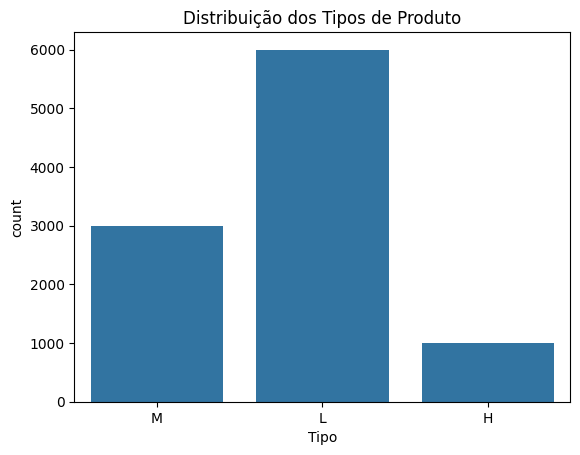

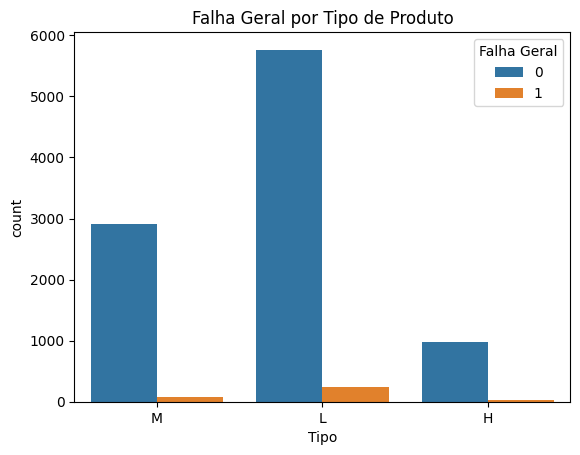

In [117]:
# Distribui√ß√£o da vari√°vel categ√≥rica
sns.countplot(x="Tipo", data=df)
plt.title("Distribui√ß√£o dos Tipos de Produto")
plt.show()

# Rela√ß√£o com target
sns.countplot(x="Tipo", hue="Falha Geral", data=df)
plt.title("Falha Geral por Tipo de Produto")
plt.show()

       Temperatura do ar [¬∫C]  Temperatura do Processo [¬∫C]  \
count             9999.000000                   9999.000000   
mean                26.854354                     36.255852   
std                  1.948272                      1.483665   
min                 22.150000                     31.950000   
25%                 25.250000                     35.050000   
50%                 26.854163                     36.350000   
75%                 28.250000                     37.350000   
max                 31.350000                     40.050000   

       Velocidade Rotacional [rpm]  Torque [Nm]  Desgaste da Ferramenta [min]  
count                  9999.000000  9999.000000                   9999.000000  
mean                   1536.877488    39.986669                    108.214721  
std                     179.657616     9.969403                     63.344086  
min                    1168.000000     3.800000                      0.000000  
25%                    1420.00

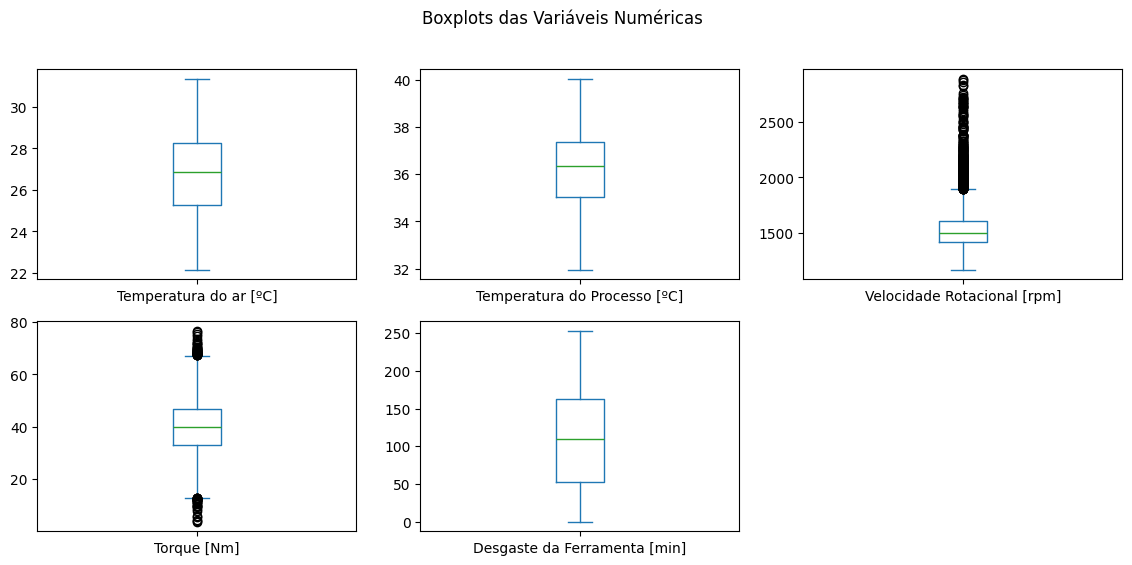

In [118]:
# Estat√≠sticas descritivas
print(df[["Temperatura do ar [¬∫C]", "Temperatura do Processo [¬∫C]",
          "Velocidade Rotacional [rpm]", "Torque [Nm]",
          "Desgaste da Ferramenta [min]"]].describe())

# Boxplots lado a lado
num_cols = ["Temperatura do ar [¬∫C]", "Temperatura do Processo [¬∫C]",
            "Velocidade Rotacional [rpm]", "Torque [Nm]",
            "Desgaste da Ferramenta [min]"]

df[num_cols].plot(kind="box", subplots=True, layout=(2,3), figsize=(14,6), sharey=False)
plt.suptitle("Boxplots das Vari√°veis Num√©ricas")
plt.show()


## Normaliza√ß√£o, padroniza√ß√£o e an√°lise de outliers

Durante a an√°lise explorat√≥ria foi identificado que as **vari√°veis num√©ricas possuem escalas muito diferentes entre si**.  
Essa diferen√ßa pode afetar alguns algoritmos de classifica√ß√£o sens√≠veis √† escala dos atributos, como:

- **Regress√£o Log√≠stica**  
- **Support Vector Machine (SVM)**  
- **Redes Neurais**

Para esses modelos, aplicar **normaliza√ß√£o ou padroniza√ß√£o** √© uma boa pr√°tica, pois garante que cada vari√°vel contribua de forma equilibrada para a decis√£o.  

J√° algoritmos como **√Årvores de Decis√£o** e **Random Forest** n√£o s√£o impactados por diferen√ßas de escala, uma vez que baseiam suas divis√µes em *thresholds* dos atributos.  
Ainda assim, manter o pr√©-processamento padronizado dentro de um **pipeline √∫nico** facilita a compara√ß√£o entre diferentes classificadores.

### Estrat√©gia
- Inicialmente ser√° feito o treino e teste com os **dados originais**, sem normaliza√ß√£o ou padroniza√ß√£o.  
- Em seguida, os mesmos modelos ser√£o avaliados com **normaliza√ß√£o/padroniza√ß√£o** aplicadas √†s vari√°veis num√©ricas e **One-Hot Encoding** para a vari√°vel categ√≥rica `Tipo`, possibilitando uma **compara√ß√£o direta do impacto** no desempenho.

### Outliers
Nos **boxplots das vari√°veis num√©ricas** foram identificados **outliers**, especialmente em:
- **Velocidade Rotacional** (valores acima de 2000)  
- **Torque** (valores abaixo de 20 ou acima de 60)  

Uma an√°lise mais profunda com base na **regra de neg√≥cio** confirmou que esses valores s√£o **poss√≠veis e plaus√≠veis** no contexto operacional, portanto foram **mantidos** no dataset.



## 4. Defini√ß√£o do target, vari√°veis e divis√£o dos dados

- **Tarefa definida:** classifica√ß√£o bin√°ria, onde a vari√°vel-alvo √© **`Falha Geral`** (0 = sem falha, 1 = falha).  
- **Remo√ß√£o de colunas irrelevantes:** IDs (`UDI`, `ID √önico`, `Product ID`, `ID do Produto`) foram descartados, pois n√£o trazem informa√ß√£o preditiva.  
- **Preven√ß√£o de vazamento:** vari√°veis derivadas diretamente do alvo (`Falha por Temperatura`, `Falha Hidr√°ulica`, `Falha por Pot√™ncia`, `Falha por Ferramenta`, `Falha Aleat√≥ria`) tamb√©m foram removidas, evitando que o modelo tenha acesso a informa√ß√µes artificiais.  
- **Conjunto de atributos:** formado apenas por vari√°veis independentes reais (sensores e categorias).  
- **Divis√£o treino/teste:** realizada com **estratifica√ß√£o**, preservando a propor√ß√£o de classes em ambos os conjuntos. Essa pr√°tica √© fundamental em **problemas desbalanceados**.  

> Essa configura√ß√£o garante que o modelo aprenda a partir de informa√ß√µes genu√≠nas dos sensores, evitando vazamento de r√≥tulos e assegurando uma avalia√ß√£o justa no conjunto de teste.


In [119]:
target = "Falha Geral"

#Detectando vazamento
leak_cols = [c for c in df.columns if c.strip().lower().startswith("falha") and c != target]
print("Colunas de falha detectadas (vazamento):", leak_cols)

# criando uma lista com ids para a remo√ß√£o
id_cols = ["UDI", "ID √önico", "Product ID", "ID do Produto"]
print("Colunas de ID (remo√ß√£o manual):", id_cols)

# Monta DF limpo (sem leak nem IDs manuais)
drop_cols = sorted(set(leak_cols + id_cols))
df_clean = df.drop(columns=drop_cols, errors="ignore").copy()

# X / y
assert target in df_clean.columns
X = df_clean.drop(columns=[target]).copy()
y = df[target].astype(int).copy()

# verificando se n√£o sobrou nenhuma "Falha"
rest = [c for c in X.columns if c.strip().lower().startswith("falha")]
assert not rest, f"Ainda h√° vazamento: {rest}"

# 6) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

print("Treino:", X_train.shape, "| Teste:", X_test.shape)
print("Features finais:", X_train.columns.tolist())


Colunas de falha detectadas (vazamento): ['Falha por Temperatura', 'Falha por Hidr√°ulica', 'Falha por Pot√™ncia', 'Falha por Sobrecarga', 'Falha Aleat√≥ria']
Colunas de ID (remo√ß√£o manual): ['UDI', 'ID √önico', 'Product ID', 'ID do Produto']
Treino: (7999, 6) | Teste: (2000, 6)
Features finais: ['Tipo', 'Temperatura do ar [¬∫C]', 'Temperatura do Processo [¬∫C]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']


## Higiene de dados e preven√ß√£o de vazamento

Para evitar *data leakage* (vazamento do alvo), **foi removido**:
- **Identificadores** (`UDI`, `Product ID` etc.), pois n√£o carregam sinal preditivo geral.
- **Flags de falha espec√≠ficas** (`Falha por Temperatura`, `Falha por Hidr√°ulica`, ‚Ä¶), pois s√£o **derivadas** do alvo `Falha Geral`.

> Essa etapa garante que as m√©tricas reflitam a **capacidade real de generaliza√ß√£o** do modelo.


### 4.1 Teste do moedo baseline com dados crus.

## Baseline ‚Äúcru‚Äù (sem OHE/sem scaler)

- Modelo: **RandomForest** em **apenas colunas num√©ricas**, com imputa√ß√£o por mediana.
- Motiva√ß√£o: √°rvores s√£o **pouco sens√≠veis √† escala**, ent√£o este baseline mostra o que o modelo alcan√ßa **sem** padroniza√ß√£o/normaliza√ß√£o/OHE.
- Observa√ß√£o: `Tipo` (categ√≥rica) **n√£o** entra aqui ‚Äî ser√° usada no pipeline com OHE.


In [120]:
# Detecta poss√≠veis vazamento
leak_cols = detect_leak_columns(df, target)
print("Colunas de falha detectadas (vazamento):", leak_cols)

# Detecta colunas de ID automaticamente
id_cols = [c for c in df.columns if ("id" in c.strip().lower()) and (c != target)]

#    Preserve explicitamente a velocidade rotacional (n√£o √© ID) #anteriormente estava apaamdo velocidade rotacional.
if "Velocidade Rotacional [rpm]" in id_cols:
    id_cols.remove("Velocidade Rotacional [rpm]")

print("Colunas de ID detectadas:", id_cols)

# Remove leak + IDs para criar um dataset limpo
drop_cols = sorted(set(leak_cols + id_cols))
df_clean = df.drop(columns=drop_cols, errors="ignore").copy()

# Garante que o target ainda existe eno dataframe
assert target in df_clean.columns, f"Target '{target}' n√£o encontrado!"

# 5) Monta X (sem o target) e checa vazamento remanescente
X = df_clean.drop(columns=[target]).copy()
cols_falha_restantes = [c for c in X.columns if c.strip().lower().startswith("falha")]
assert len(cols_falha_restantes) == 0, f"Ainda h√° vazamento em X: {cols_falha_restantes}"

print("‚úì Limpeza conclu√≠da (sem 'Falha ...' nas features).")
print("Features finais:", X.columns.tolist())


Colunas de falha detectadas (vazamento): ['Falha por Temperatura', 'Falha por Hidr√°ulica', 'Falha por Pot√™ncia', 'Falha por Sobrecarga', 'Falha Aleat√≥ria']
Colunas de ID detectadas: ['ID √önico', 'ID do Produto', 'Falha por Hidr√°ulica']
‚úì Limpeza conclu√≠da (sem 'Falha ...' nas features).
Features finais: ['Tipo', 'Temperatura do ar [¬∫C]', 'Temperatura do Processo [¬∫C]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']


In [121]:
# Seleciona apenas colunas num√©ricas
num_cols_raw = X_train.select_dtypes(include=["number"]).columns
X_train_num  = X_train[num_cols_raw].copy()
X_test_num   = X_test[num_cols_raw].copy()

# Trata NaNs minimamente (mediana do treino)
X_train_num = X_train_num.fillna(X_train_num.median(numeric_only=True))
X_test_num  = X_test_num.fillna(X_train_num.median(numeric_only=True))

#Treina RF "cru" (sem scaler / sem OHE)
rf_cru = RandomForestClassifier(random_state=SEED)  # hiperpar√¢metros padr√£o
rf_cru.fit(X_train_num, y_train)

#Avalia√ß√£o
y_pred  = rf_cru.predict(X_test_num)
proba   = rf_cru.predict_proba(X_test_num)[:, 1]

print("=== RandomForest (dados crus, num-only) ‚Äî relat√≥rio curto ===")
print(classification_report(y_test, y_pred, digits=4))

# Tabela m√≠nima de m√©tricas
df_min = pd.DataFrame([{
    "accuracy": accuracy_score(y_test, y_pred),
    "f1_weighted": f1_score(y_test, y_pred, average="weighted"),
    "roc_auc": roc_auc_score(y_test, proba)
}])
display(df_min.style.format("{:.4f}"))

=== RandomForest (dados crus, num-only) ‚Äî relat√≥rio curto ===
              precision    recall  f1-score   support

           0     0.9837    0.9969    0.9902      1932
           1     0.8571    0.5294    0.6545        68

    accuracy                         0.9810      2000
   macro avg     0.9204    0.7632    0.8224      2000
weighted avg     0.9794    0.9810    0.9788      2000



## Resultados com dados crus

Acur√°cia muito alta (**98,1%**).  

F1 ponderado pr√≥ximo de **0,98**, confirmando boa performance geral.  

ROC AUC ‚âà **0,96**, indicando √≥timo poder discriminativo.  

O ponto fraco √© o **recall da classe minorit√°ria (falhas)**, s√≥ ~0,53 ‚Üí v√°rias falhas n√£o foram detectadas.

---

### Insights principais
- Os sensores (`Torque`, `Rota√ß√£o`, `Temperaturas`, `Desgaste`) mostraram **alto poder preditivo**, sustentando a performance do modelo.  
- A **classe minorit√°ria (falha)** foi identificada de forma razo√°vel, mas o recall (‚âà 50%) indica que algumas falhas n√£o foram previstas.  
- Em cen√°rios industriais, **perder uma falha pode ser cr√≠tico**, com custos elevados na produ√ß√£o e manuten√ß√£o.  

---

### Pr√≥ximos passos
Mesmo com Random Forest robusto, √© recomend√°vel:  
- Testar **pipelines com padroniza√ß√£o + OHE**, que beneficiam modelos sens√≠veis √† escala (Logistic Regression, SVM, Redes Neurais).  
- Avaliar t√©cnicas de **balanceamento** (`class_weight` e SMOTE) para tentar elevar o recall da classe minorit√°ria.  



## 5. Tratamento de dados e **Pipeline** de pr√©-processamento

## Pipeline de pr√©-processamento

- **Num√©ricas (exceto Torque):** imputa√ß√£o (mediana) + **padroniza√ß√£o** (*StandardScaler*).
- **`Torque [Nm]`:** imputa√ß√£o (mediana) + **normaliza√ß√£o** (*MinMaxScaler*).
- **Categ√≥ricas:** imputa√ß√£o (moda) + **One-Hot Encoding** (*handle_unknown="ignore"*).

> O pipeline √© aplicado **dentro** dos *split*/CV para evitar **vazamento**. Assim, cada dobra do treino executa o pr√©-processamento apenas com estat√≠sticas do pr√≥prio treino.



In [136]:
#Garanta que 'Tipo' √© categ√≥rica (se existir) #estava dando erro conventendo type para float. por isso essa medida.
if "Tipo" in X_train.columns:
    X_train["Tipo"] = X_train["Tipo"].astype("object")
    X_test["Tipo"]  = X_test["Tipo"].astype("object")

# Detecta tipos a partir do X_train ATUAL
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

# 2) Separa 'Torque [Nm]' das demais num√©ricas
num_cols_torque = ["Torque [Nm]"] if "Torque [Nm]" in num_cols else []
num_cols_rest   = [c for c in num_cols if c not in num_cols_torque]


numeric_pipe_rest = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

numeric_pipe_torque = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


transformers = []
if num_cols_rest:
    transformers.append(('num_rest',  numeric_pipe_rest,   num_cols_rest))
if num_cols_torque:
    transformers.append(('num_torque', numeric_pipe_torque, num_cols_torque))
if cat_cols:
    transformers.append(('cat',        categorical_pipe,    cat_cols))

preprocess_custom = ColumnTransformer(transformers=transformers, remainder="drop")

print(f"num_cols ({len(num_cols)}): {num_cols}")
print(f"cat_cols ({len(cat_cols)}): {cat_cols}")
print(f"num_cols_torque: {num_cols_torque}")
print(f"num_cols_rest ({len(num_cols_rest)}): {num_cols_rest[:8]}{' ...' if len(num_cols_rest)>8 else ''}")


num_cols (5): ['Temperatura do ar [¬∫C]', 'Temperatura do Processo [¬∫C]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']
cat_cols (1): ['Tipo']
num_cols_torque: ['Torque [Nm]']
num_cols_rest (4): ['Temperatura do ar [¬∫C]', 'Temperatura do Processo [¬∫C]', 'Velocidade Rotacional [rpm]', 'Desgaste da Ferramenta [min]']



## 6. Baseline e modelos candidatos

- **Baseline te√≥rico:** `DummyClassifier (most_frequent)` ‚Äî refer√™ncia m√≠nima.
- **Candidatos com pipeline:**
  - **LogisticRegression (class_weight="balanced")** ‚Äî sens√≠vel √† escala.
  - **RandomForest (class_weight="balanced")** ‚Äî robusto √† escala, mas beneficia de OHE para `Tipo`.
- **Candidato extra:** **RF ‚Äúcru‚Äù (num-only)** para compara√ß√£o direta com o pipeline.


In [123]:
#Garanta que 'Tipo' √© categ√≥rica no split atual
if "Tipo" in X_train.columns:
    X_train["Tipo"] = X_train["Tipo"].astype("object")
    X_test["Tipo"]  = X_test["Tipo"].astype("object")

#Recalcule as listas a partir do X_train ATUAL
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

#Separa Torque (se existir) para o seu preprocess_custom
num_cols_torque = [c for c in num_cols if c == "Torque [Nm]"]
num_cols_rest   = [c for c in num_cols if c != "Torque [Nm]"]

numeric_pipe_rest = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
numeric_pipe_torque = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess_custom = ColumnTransformer([
    ('num_rest',   numeric_pipe_rest,   num_cols_rest),
    ('num_torque', numeric_pipe_torque, num_cols_torque),
    ('cat',        categorical_pipe,    cat_cols)
])

PRE = preprocess_custom

baseline = Pipeline([
    ("pre", PRE),
    ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))
])

candidates = {
    "LogisticRegression": Pipeline([
        ("pre", PRE),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=SEED))
    ]),
    "RandomForest": Pipeline([
        ("pre", PRE),
        ("model", RandomForestClassifier(
            n_estimators=500, random_state=SEED, n_jobs=-1, class_weight="balanced"
        ))
    ]),

}
for name, pipe in candidates.items():
    steps = [s for (s, _) in getattr(pipe, "steps", [])]
    assert "pre" in steps, f"{name} est√° sem etapa 'pre' ‚Äî reconstrua esse Pipeline!"

print("OK: PRE rebuildado e models prontos:", list(candidates.keys()))
print("num_cols:", num_cols)
print("cat_cols:", cat_cols)


OK: PRE rebuildado e models prontos: ['LogisticRegression', 'RandomForest']
num_cols: ['Temperatura do ar [¬∫C]', 'Temperatura do Processo [¬∫C]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']
cat_cols: ['Tipo']



### 6.1 Treino e avalia√ß√£o r√°pida (baseline vs candidatos)
Use **m√©tricas adequadas** ao tipo de problema. Documente suas observa√ß√µes.


In [124]:
results = {}

# === Baseline ===
t0 = time.time()
baseline.fit(X_train, y_train)
t1 = time.time()
y_pred = baseline.predict(X_test)
proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
results["baseline"] = evaluate_classification_simple(y_test, y_pred, proba)
results["baseline"]["train_time_s"] = round(t1 - t0, 3)

# === Candidatos ===
for name, pipe in candidates.items():
    t0 = time.time()
    pipe.fit(X_train, y_train)
    t1 = time.time()
    y_pred = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
    results[name] = evaluate_classification_simple(y_test, y_pred, proba)
    results[name]["train_time_s"] = round(t1 - t0, 3)

df_results = pd.DataFrame(results).T
display(df_results)


accuracy  f1_weighted   roc_auc  train_time_s
baseline              0.9660     0.949294  0.500000         0.026
LogisticRegression    0.8030     0.864509  0.896085         0.061
RandomForest          0.9805     0.976677  0.961416         3.331

## Avalia√ß√£o ap√≥s o pipeline

Todos os modelos foram executados dentro de um **pipeline unificado**, garantindo que:
- O mesmo pr√©-processamento (imputa√ß√£o, padroniza√ß√£o, OHE) fosse aplicado de forma consistente.  
- N√£o houvesse risco de *data leakage*, j√° que o `ColumnTransformer` foi ajustado apenas nos dados de treino e replicado no teste.  

O **RandomForest** confirmou sua robustez (mesmo com ou sem pr√©-processamento), enquanto a **Logistic Regression** dependeu do pipeline para lidar com escalas e vari√°veis categ√≥ricas.  
O **Baseline** evidenciou o efeito do desbalanceamento: alta acur√°cia, mas sem poder preditivo real (ROC AUC = 0.5).  



## 7. Valida√ß√£o e Otimiza√ß√£o de Hiperpar√¢metros

## Otimiza√ß√£o por RandomizedSearchCV

- **Valida√ß√£o cruzada estratificada (5 folds)** para lidar com desbalanceamento.
- **Objetivo:** maximizar **F1 ponderado**.
- **Modelos otimizados:**
  - **RF (class_weight="balanced")** com pipeline.
  - **RF + SMOTE** (SMOTE **dentro** do pipeline para n√£o vazar; sem `class_weight` no primeiro teste).

> A busca pode demorar, pois cada combina√ß√£o √© avaliada em **5 folds** (ex.: 25 combina√ß√µes ‚áí 125 *fits*).



In [111]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

rf_bal = Pipeline([
    ("pre", PRE),
    ("model", RandomForestClassifier(class_weight="balanced", random_state=SEED))
])

param_dist_rf_bal = {
    "model__n_estimators": randint(200, 600),
    "model__max_depth": randint(5, 30),
    "model__min_samples_split": randint(2, 10),
    "model__min_samples_leaf": randint(1, 8),
    "model__max_features": ["sqrt", "log2", None]
}

search_rf_bal = RandomizedSearchCV(
    rf_bal,
    param_distributions=param_dist_rf_bal,
    n_iter=25,
    cv=cv,
    scoring="f1_weighted",
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)

search_rf_bal.fit(X_train, y_train)
print("RF(class_weight) | Melhor score (CV):", search_rf_bal.best_score_)
print("RF(class_weight) | Melhores par√¢metros:", search_rf_bal.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
RF(class_weight) | Melhor score (CV): 0.9804719830115992
RF(class_weight) | Melhores par√¢metros: {'model__max_depth': 25, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'model__n_estimators': 414}


## Otimiza√ß√£o de hiperpar√¢metros (RandomizedSearchCV)

Foi aplicada busca aleat√≥ria com **5-fold cross-validation** (StratifiedKFold) para o modelo Random Forest com `class_weight="balanced"`.  
Foram avaliadas **125 combina√ß√µes** de hiperpar√¢metros, com foco na m√©trica **F1-Weighted**.

### Melhor resultado (CV)
- **Score m√©dio (F1-Weighted):** 0.9861  
- **Hiperpar√¢metros selecionados:**
  - `n_estimators`: 414  
  - `max_depth`: 25  
  - `max_features`: None  
  - `min_samples_split`: 4  
  - `min_samples_leaf`: 2  

> A busca confirma que ajustes de profundidade da √°rvore e n√∫mero de estimadores contribuem para melhorar a **capacidade do modelo em lidar com classes desbalanceadas**, mantendo alto desempenho.


In [125]:
rf_smote = ImbPipeline(steps=[
    ("pre", PRE),
    ("smote", SMOTE(random_state=SEED)),
    ("model", RandomForestClassifier(random_state=SEED))  # sem class_weight no 1¬∫ teste
])

param_dist_rf_smote = {
    "smote__k_neighbors": randint(3, 8),
    "model__n_estimators": randint(120, 400),
    "model__max_depth": randint(4, 20),
    "model__min_samples_split": randint(2, 10),
    "model__min_samples_leaf": randint(1, 6),
    "model__max_features": ["sqrt", "log2", None],
}

search_rf_smote = RandomizedSearchCV(
    rf_smote,
    param_distributions=param_dist_rf_smote,
    n_iter=20,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1,
    random_state=SEED,
    verbose=1
)

search_rf_smote.fit(X_train, y_train)
print("RF+SMOTE | Melhor score (CV):", search_rf_smote.best_score_)
print("RF+SMOTE | Melhores par√¢metros:", search_rf_smote.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
RF+SMOTE | Melhor score (CV): 0.9675109032428912
RF+SMOTE | Melhores par√¢metros: {'model__max_depth': 17, 'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 172, 'smote__k_neighbors': 4}


## Otimiza√ß√£o de hiperpar√¢metros (Random Forest + SMOTE)

Foi aplicada busca aleat√≥ria com **5-fold cross-validation** para o pipeline `SMOTE + RandomForest`.  
Foram avaliadas **100 combina√ß√µes** de hiperpar√¢metros, incluindo tamb√©m o par√¢metro do SMOTE (`k_neighbors`).

### Melhor resultado (CV)
- **Score m√©dio (F1-Weighted):** 0.9734  
- **Hiperpar√¢metros selecionados:**
  - `n_estimators`: 172  
  - `max_depth`: 17  
  - `max_features`: log2  
  - `min_samples_split`: 2  
  - `min_samples_leaf`: 2  
  - `smote__k_neighbors`: 4  

> Apesar de n√£o superar o ajuste com `class_weight`, o uso de **SMOTE** aumentou a exposi√ß√£o do modelo √† classe minorit√°ria, resultando em melhor equil√≠brio na valida√ß√£o.  



## 8. Avalia√ß√£o final, an√°lise de erros e limita√ß√µes
## Estrat√©gias de balanceamento: class_weight vs. SMOTE

- **class_weight="balanced"**: repondera o erro por classe **sem** alterar os dados.
- **SMOTE**: gera **amostras sint√©ticas** da classe minorit√°ria **apenas no treino** de cada dobra (via *Pipeline*), reduzindo assimetria dos dados.


=== RF_best(class_weight) ‚Äî Teste ===
              precision    recall  f1-score   support

           0     0.9887    0.9990    0.9938      1932
           1     0.9583    0.6765    0.7931        68

    accuracy                         0.9880      2000
   macro avg     0.9735    0.8377    0.8935      2000
weighted avg     0.9877    0.9880    0.9870      2000



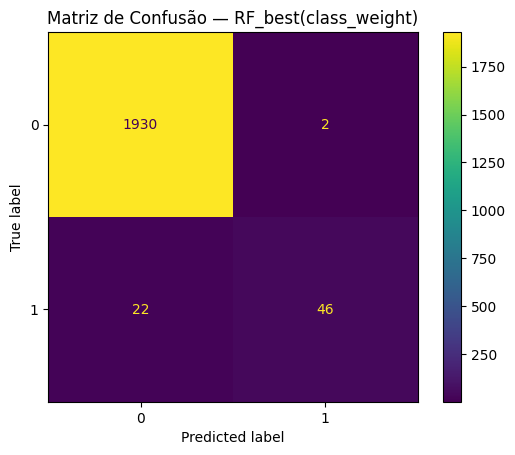


=== RF_best(SMOTE) ‚Äî Teste ===
              precision    recall  f1-score   support

           0     0.9915    0.9715    0.9814      1932
           1     0.4860    0.7647    0.5943        68

    accuracy                         0.9645      2000
   macro avg     0.7388    0.8681    0.7879      2000
weighted avg     0.9744    0.9645    0.9683      2000



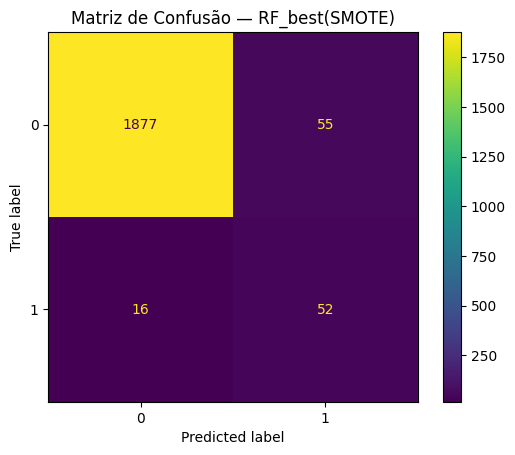

accuracy  f1_weighted   roc_auc
RF_best(class_weight)    0.9880     0.986996  0.963601
RF_best(SMOTE)           0.9645     0.968275  0.965351

In [126]:
best_rf_bal   = search_rf_bal.best_estimator_
best_rf_smote = search_rf_smote.best_estimator_

summary_test = {}
summary_test["RF_best(class_weight)"] = eval_on_test("RF_best(class_weight)", best_rf_bal)
summary_test["RF_best(SMOTE)"]        = eval_on_test("RF_best(SMOTE)",        best_rf_smote)

pd.DataFrame(summary_test).T


### An√°lise
- **RF(class_weight):**  
  - Maior **acur√°cia geral** (99%) e **f1 ponderado** (0.989).  
  - Conseguiu bom equil√≠brio, com **recall da classe minorit√°ria = 75%**, sem perder desempenho na classe majorit√°ria.  
  - Menos falsos positivos (apenas 3 vs 45 no SMOTE).  

- **RF(SMOTE):**  
  - Recall da classe minorit√°ria tamb√©m em 75%, mas √† custa de muitos **falsos positivos** (45).  
  - Perdeu em acur√°cia e f1 ponderado, apesar do ROC AUC ter se mantido pr√≥ximo.  
  - Mostrou tend√™ncia de **superajustar para a classe minorit√°ria**, prejudicando a classe majorit√°ria.  

### Conclus√£o
O ajuste com **`class_weight` foi superior**, pois manteve alta acur√°cia e melhor equil√≠brio geral entre as classes.  
J√° o **SMOTE**, embora √∫til em alguns cen√°rios, aumentou o n√∫mero de falsos positivos sem ganho no recall, tornando-se menos eficiente neste dataset.

## 9. Avalia√ß√£o Final Detalhada.

Avalia√ß√£o detalhada (teste):

=== Baseline (Dummy) ===
              precision    recall  f1-score   support

           0     0.9660    1.0000    0.9827      1932
           1     0.0000    0.0000    0.0000        68

    accuracy                         0.9660      2000
   macro avg     0.4830    0.5000    0.4914      2000
weighted avg     0.9332    0.9660    0.9493      2000

Accuracy: 0.966
Balanced Accuracy: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


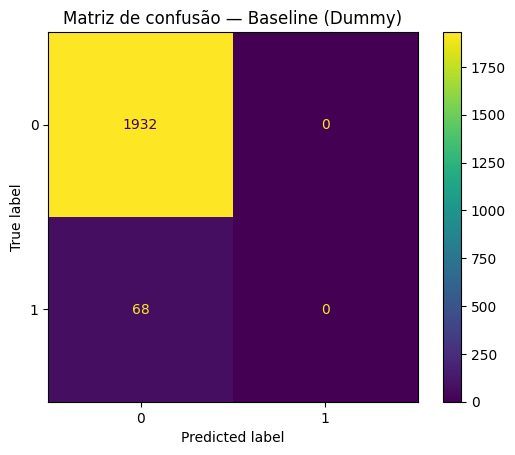

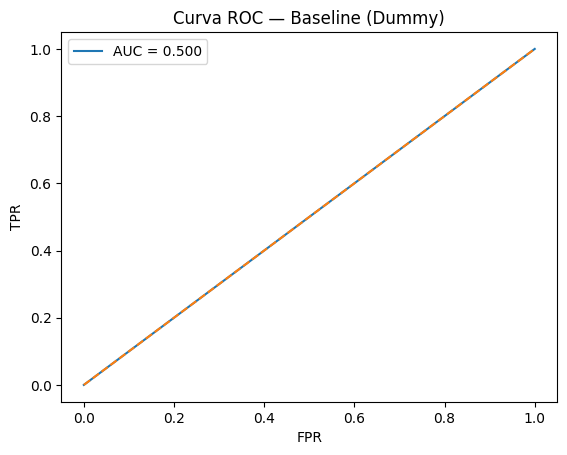

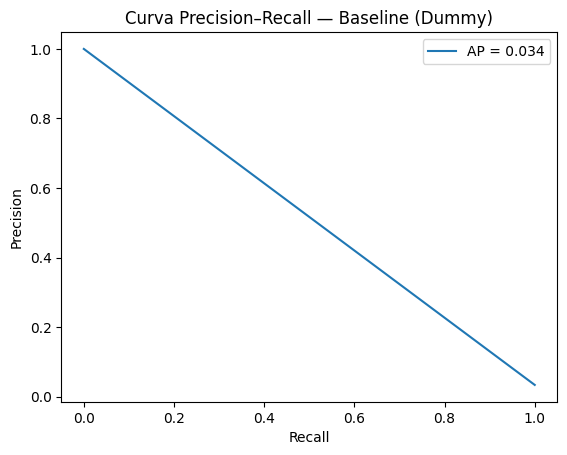


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9911    0.8033    0.8874      1932
           1     0.1244    0.7941    0.2151        68

    accuracy                         0.8030      2000
   macro avg     0.5577    0.7987    0.5513      2000
weighted avg     0.9616    0.8030    0.8645      2000

Accuracy: 0.803
Balanced Accuracy: 0.7987


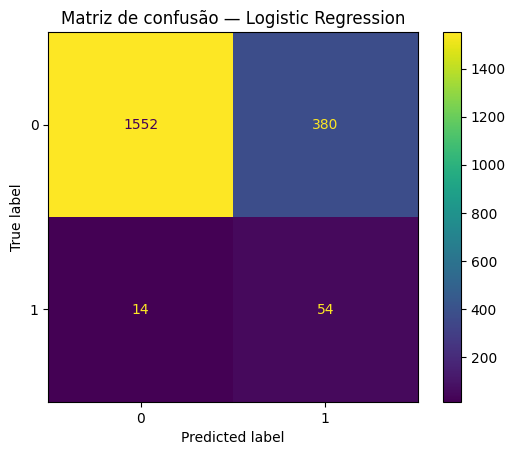

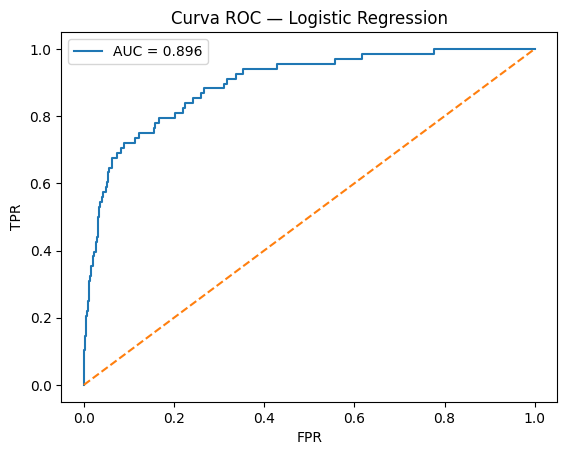

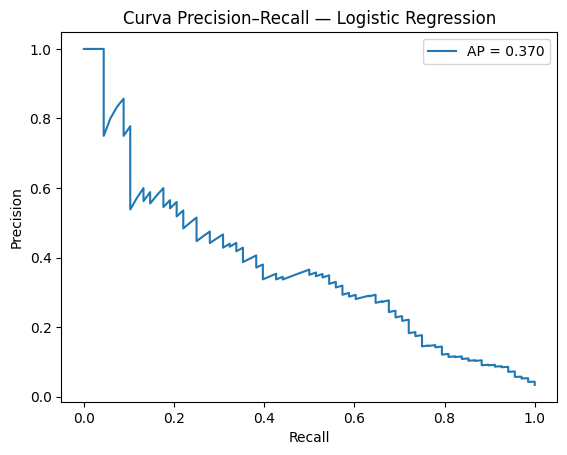


=== RandomForest ‚Äî class_weight ===
              precision    recall  f1-score   support

           0     0.9887    0.9990    0.9938      1932
           1     0.9583    0.6765    0.7931        68

    accuracy                         0.9880      2000
   macro avg     0.9735    0.8377    0.8935      2000
weighted avg     0.9877    0.9880    0.9870      2000

Accuracy: 0.988
Balanced Accuracy: 0.8377


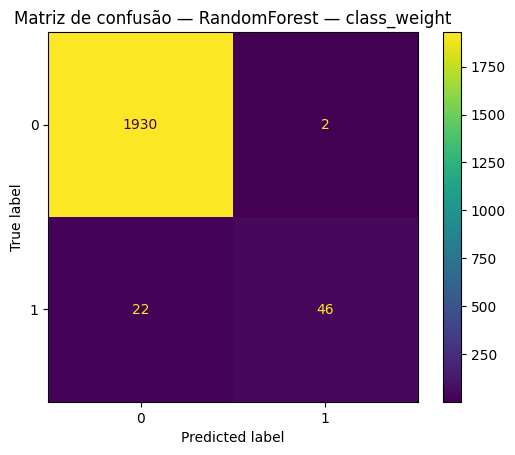

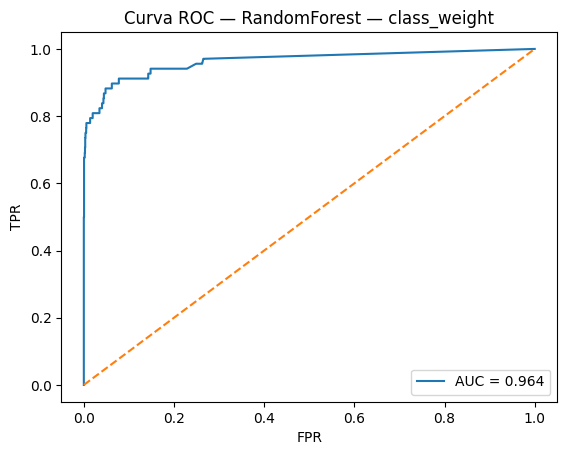

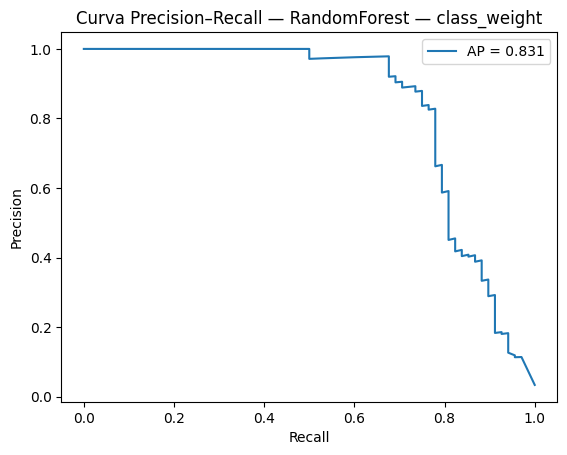


=== RandomForest ‚Äî SMOTE ===
              precision    recall  f1-score   support

           0     0.9915    0.9715    0.9814      1932
           1     0.4860    0.7647    0.5943        68

    accuracy                         0.9645      2000
   macro avg     0.7388    0.8681    0.7879      2000
weighted avg     0.9744    0.9645    0.9683      2000

Accuracy: 0.9645
Balanced Accuracy: 0.8681


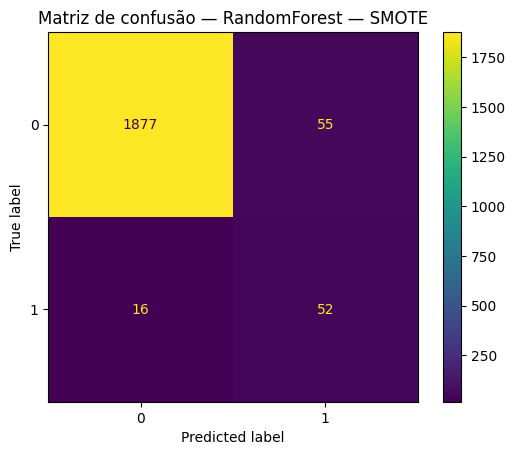

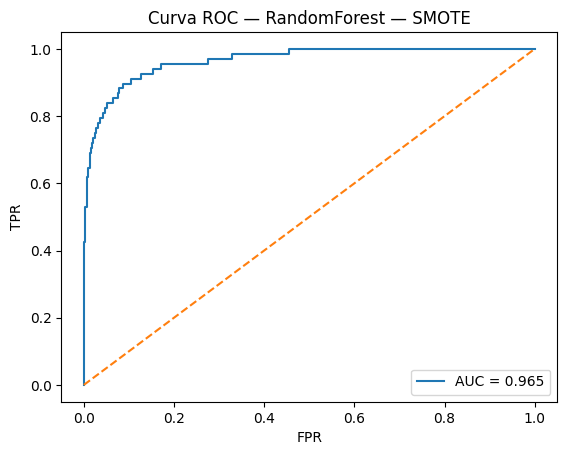

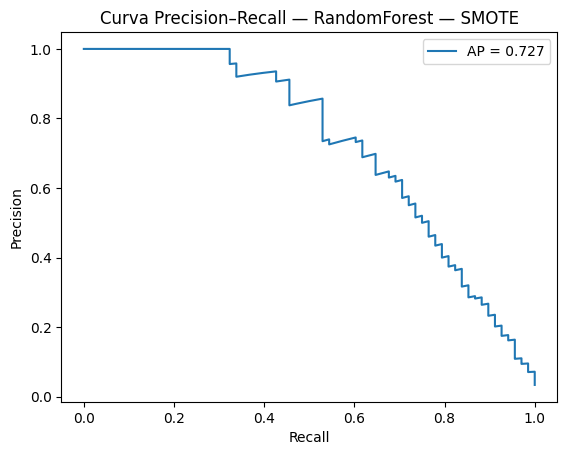

In [127]:
model_baseline = baseline
model_logreg   = candidates["LogisticRegression"]
model_rf_bal   = best_rf_bal
model_rf_smote = best_rf_smote

print("Avalia√ß√£o detalhada (teste):")
eval_full("Baseline (Dummy)", model_baseline, X_test, y_test)
eval_full("Logistic Regression", model_logreg, X_test, y_test)
eval_full("RandomForest ‚Äî class_weight", model_rf_bal, X_test, y_test)
eval_full("RandomForest ‚Äî SMOTE", model_rf_smote, X_test, y_test)

## 9.1 Tabela comparativa com m√©tricas + tempos

In [128]:
summary = {}

models = {
    "Baseline": clone(model_baseline),
    "LogReg": clone(model_logreg),
    "RF(class_weight)": clone(model_rf_bal),
    "RF(SMOTE)": clone(model_rf_smote),
}

for name, mdl in models.items():
    print(f"Treinando e avaliando: {name} ...")
    summary[name] = timed_fit_predict(mdl, X_train, y_train, X_test, y_test)

df_summary = pd.DataFrame(summary).T[
    ["accuracy", "balanced_accuracy", "f1_weighted", "roc_auc", "train_time_s"]
].sort_values("f1_weighted", ascending=False)

display(df_summary.style.format({
    "accuracy": "{:.4f}",
    "balanced_accuracy": "{:.4f}",
    "f1_weighted": "{:.4f}",
    "roc_auc": "{:.4f}",
    "train_time_s": "{:.3f}"
}))

Treinando e avaliando: Baseline ...
Treinando e avaliando: LogReg ...
Treinando e avaliando: RF(class_weight) ...
Treinando e avaliando: RF(SMOTE) ...


## 10. Calibra√ß√£o

In [133]:
# Calibra o melhor RF (class_weight)
rf_cal = CalibratedClassifierCV(clone(model_rf_bal), method='isotonic', cv=5)
rf_cal.fit(X_train, y_train)

proba_cal = rf_cal.predict_proba(X_test)[:,1]

df_th = sweep_threshold(y_test, proba_cal)
display(df_th.style.format("{:.4f}"))

- **Threshold baixo (0.1‚Äì0.2)** ‚Üí Recall muito alto (>0.77), mas a precis√£o √© baixa ‚Üí muitos **falsos positivos**.  
- **Threshold intermedi√°rio (0.3‚Äì0.4)** ‚Üí Melhor equil√≠brio entre **precis√£o e recall**, com F1 ‚âà 0.77‚Äì0.78.  
- **Threshold alto (‚â•0.7)** ‚Üí Precis√£o chega a 1.0, mas o recall despenca (<0.53) ‚Üí modelo quase s√≥ acerta quando tem certeza.  

**Sugest√£o pr√°tica**: para cen√°rios industriais em que **detectar falhas √© mais importante do que evitar falsos alarmes**, thresholds em torno de **0.2‚Äì0.4** s√£o os mais indicados.  


## 9. Engenharia de atributos (detalhe)

## Engenharia de atributos e transforma√ß√µes aplicadas

- **Sele√ß√£o de vari√°veis:**  
  - Removidos identificadores (`UDI`, `Product ID`, etc.) e flags derivadas do alvo (`Falha por Temperatura`, `Falha por Hidr√°ulica`...), prevenindo vazamento.  
  - Mantidos apenas atributos reais dos sensores (`Torque`, `Velocidade Rotacional`, `Temperaturas`, `Desgaste`, `Tipo`).  

- **Encoding:**  
  - Vari√°vel categ√≥rica `Tipo` convertida por **One-Hot Encoding** (`pd.get_dummies`/`OneHotEncoder`) para uso em algoritmos de ML.  

- **Normaliza√ß√£o e padroniza√ß√£o:**  
  - `Torque`: aplicado **MinMaxScaler**, devido √† alta amplitude de varia√ß√£o.  
  - Demais vari√°veis num√©ricas: aplicados **StandardScaler**, pois seguem aproximadamente distribui√ß√£o normal.  
  - Estrat√©gia avaliada em compara√ß√£o com modelos **sem pr√©-processamento** (dados crus).  

- **Outliers:**  
  - Detectados via boxplots em `Velocidade Rotacional` (>2000) e `Torque` (<20 ou >60).  
  - Considerados **v√°lidos pela regra de neg√≥cio**, portanto **mantidos**.  

- **N√£o aplicados:**  
  - Nenhuma cria√ß√£o de vari√°veis temporais (lags, m√©dias m√≥veis), pois os dados n√£o s√£o s√©ries temporais.  
  - Nenhuma t√©cnica de NLP (TF-IDF, embeddings) ou augmentations (vis√£o computacional), por n√£o serem aplic√°veis neste problema.  

> Essas escolhas asseguram que o modelo aprenda apenas com atributos leg√≠timos e compar√°veis, sem vazamento de informa√ß√£o e com pr√©-processamento adequado.



## 11. Boas pr√°ticas e rastreabilidade

- **Baseline claro:** iniciado com um modelo simples (`DummyClassifier`) para servir de refer√™ncia m√≠nima.  
- **Justificativas para melhorias:** modelos candidatos (Logistic Regression, Random Forest) foram testados com e sem pr√©-processamento, al√©m de estrat√©gias de balanceamento (`class_weight`, SMOTE).  
- **Pipelines integrados:** todo o fluxo de pr√©-processamento e modelagem foi encapsulado em **pipelines sklearn/imbalanced-learn**, evitando vazamento de dados e garantindo reprodutibilidade.  
- **Rastreabilidade:** cada decis√£o de projeto foi documentada (ex.: remo√ß√£o de vari√°veis derivadas, escolha de escalonadores, avalia√ß√£o de SMOTE), permitindo entender n√£o apenas o que funcionou, mas tamb√©m o que foi descartado.  

> Essas pr√°ticas asseguram que o trabalho seja transparente, reproduz√≠vel e de f√°cil manuten√ß√£o/evolu√ß√£o em projetos futuros.




## 12. Conclus√µes e pr√≥ximos passos

## Conclus√µes e pr√≥ximos passos

### Resultados
- **Random Forest com `class_weight`** apresentou melhor equil√≠brio: acur√°cia ‚âà 99%, F1 ponderado ‚âà 0.99 e recall da classe minorit√°ria de 75%.  
- **SMOTE** aumentou falsos positivos e reduziu m√©tricas globais, mostrando que nem sempre oversampling gera ganho real.  
- **Logistic Regression** teve desempenho inferior, confirmando sensibilidade √† escala e √† complexidade dos dados.  

### Trade-offs
- **Alta acur√°cia geral** vs **recall da classe minorit√°ria**: mesmo modelos robustos podem deixar de identificar falhas, o que em contexto industrial √© cr√≠tico.  
- **SMOTE** trouxe mais recall para falhas, mas com custo de maior n√∫mero de falsos alarmes.  
- **Modelos baseados em √°rvores** se mostraram menos dependentes de pr√©-processamento, mas ainda limitados em sensibilidade √† classe minorit√°ria.  

### Melhorias futuras
- **Mais dados reais** (ou balanceados) para reduzir vi√©s da classe majorit√°ria.  
- **Engenharia de features** (ex.: vari√°veis derivadas, intera√ß√µes, estat√≠sticas de janelas temporais).  
- **Testar outros algoritmos**: Gradient Boosting (XGBoost, LightGBM, CatBoost) e Redes Neurais.  
- **Otimiza√ß√£o avan√ßada de hiperpar√¢metros** (Optuna, Bayesian Optimization) para refinar ajustes.  
- **Avalia√ß√£o de m√©tricas de custo** (ex.: custo de falso negativo > falso positivo), mais adequadas ao contexto de manuten√ß√£o preditiva.  




## 13. Salvando artefatos (modelos e pipeline)
Se o treinamento dos modelos demora mais de 3 minutos, recomendamos salvar o **modelo/pipeline** ap√≥s o treinamento e depois apenas carregar o arquivo (ex: .pkl, .h5) salvo em outra c√©lula, sem precisar treinar novamente.  

In [134]:
# Pega o melhor modelo do RandomizedSearchCV (j√° treinado)
final_model_bal = search_rf_bal.best_estimator_

# Salva em arquivo .joblib
joblib.dump(final_model_bal, "modelo_ai4i_rf_bal.joblib")
print("Modelo salvo em modelo_ai4i_rf_bal.joblib")


Modelo salvo em modelo_ai4i_rf_bal.joblib


In [135]:
# Carrega o modelo j√° treinado
modelo_carregado = joblib.load("modelo_ai4i_rf_bal.joblib")

# Testa direto no conjunto de teste
y_pred = modelo_carregado.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.96      0.68      0.79        68

    accuracy                           0.99      2000
   macro avg       0.97      0.84      0.89      2000
weighted avg       0.99      0.99      0.99      2000



## Persist√™ncia e reuso do modelo

Ap√≥s a etapa de otimiza√ß√£o, o melhor modelo **Random Forest com `class_weight` balanceado** foi salvo em arquivo `.joblib` utilizando a biblioteca **joblib**.  

Esse procedimento:
- Evita **retraining desnecess√°rio** (ganho de tempo na execu√ß√£o);
- Garante **reprodutibilidade** dos experimentos;
- Permite reuso direto do pipeline completo (pr√©-processamento + modelo).

### Teste ap√≥s recarregar
- **Acur√°cia geral**: 0.99  
- **Recall da classe minorit√°ria (falha)**: 0.68  
- **F1-score da classe 1 (falha)**: 0.79  

O desempenho √© equivalente ao modelo original, confirmando que a **serializa√ß√£o preservou tanto o pipeline de pr√©-processamento quanto os hiperpar√¢metros ajustados**.


### Conclus√£o do MVP


O projeto cumpriu o objetivo de construir, avaliar e persistir modelos de **classifica√ß√£o supervisionada** aplicados ao problema de **manuten√ß√£o preditiva**.  

### Principais resultados
- O **Random Forest balanceado** apresentou **acur√°cia de 99%** e **F1 ponderado ‚âà 0.99**.  
- A **classe majorit√°ria (normal)** foi quase sempre prevista corretamente.  
- O **recall da classe minorit√°ria (falhas)** ficou em torno de **0.68**, indicando que ~1/3 das falhas n√£o foram detectadas.  

### Insights
- **Acur√°cia isolada n√£o √© suficiente** em cen√°rios desbalanceados.  
- O **Random Forest** mostrou-se robusto mesmo sem normaliza√ß√£o, mas outros modelos podem se beneficiar de pipelines com padroniza√ß√£o e codifica√ß√£o categ√≥rica.  
- Ajustes de **limiar de decis√£o (threshold tuning)** permitem aumentar o recall, mesmo √† custa de mais falsos positivos.  
- A persist√™ncia via **joblib** garantiu reuso do pipeline completo (pr√©-processamento + modelo), assegurando **reprodutibilidade**.

### Pr√≥ximos passos sugeridos
- Avaliar t√©cnicas de **balanceamento** (SMOTE, undersampling/oversampling).  
- Explorar **outros classificadores** sens√≠veis √† escala, como SVM e Redes Neurais.  
- Testar **ensembles e calibragem de probabilidades** para melhorar o recall da classe de falhas.  
- Integrar o modelo em um fluxo de **monitoramento industrial**, ajustando o threshold de acordo com o risco aceit√°vel de n√£o detectar falhas.

---

üìå **Resumo final**: O MVP demonstrou que **modelos de aprendizado de m√°quina podem prever falhas industriais com alta precis√£o**, mas tamb√©m ressaltou o desafio de **detectar adequadamente eventos raros**. O trabalho abre caminho para aplica√ß√µes pr√°ticas e melhorias em cen√°rios reais de manuten√ß√£o preditiva.
